In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px

!pip install mlxtend -q
%pip install mlxtend --upgrade -q

from mlxtend.preprocessing import TransactionEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.1 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("/content/bread basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [5]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [6]:

df['hour'] = df['date_time'].dt.hour
df['date'] = df['date_time'].dt.date
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,hour,date,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,9,2016-10-30,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016


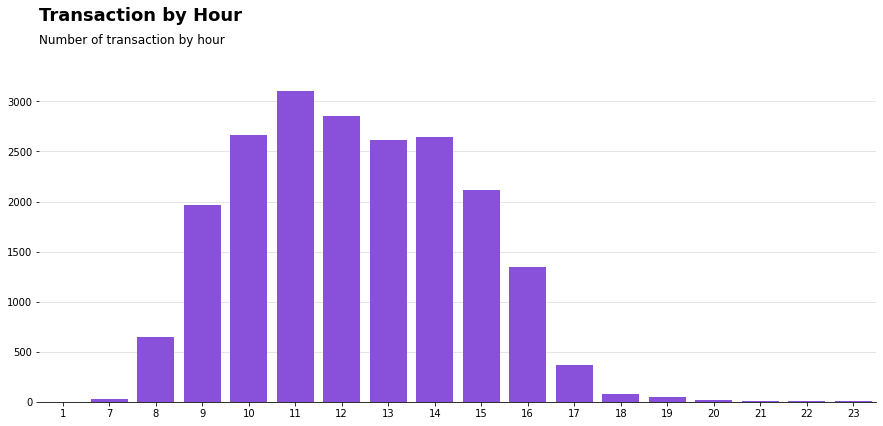

In [7]:
fig, hourT = plt.subplots(figsize=(15, 6))


hourT = sns.countplot(data=df, x='hour', color='#8539F0')
hourT.set_title("Transaction by Hour", loc='left', fontweight='bold', fontfamily = 'san serif', size=18, y=1.15)
hourT.text(0,1.1, 'Number of transaction by hour', size=12, fontfamily='san serif',transform=hourT.transAxes)


for i in ['left', 'top', 'right']:
    hourT.spines[i].set_visible(False)

hourT.grid(axis='y', linestyle='-', alpha=0.4 )
hourT.set_axisbelow(True)

hourT.set_xlabel(None)
hourT.set_ylabel(None)

plt.show();

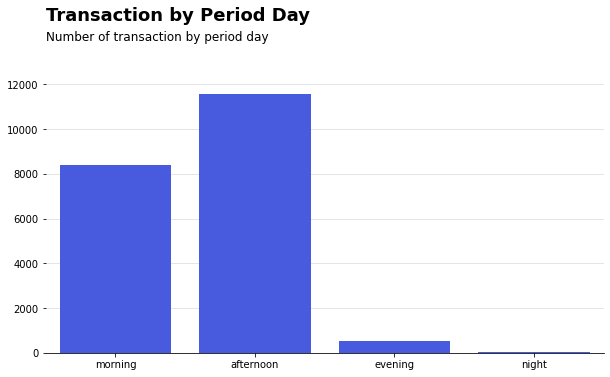

In [8]:
fig, period = plt.subplots(figsize=(10,5))

period = sns.countplot(data=df, x='period_day', color='#2F48F8')
period.set_title("Transaction by Period Day", y=1.20, size=18, fontfamily='san serif', loc='left', fontweight='bold')
period.text(0,1.15, "Number of transaction by period day", transform = period.transAxes, size=12)

for i in ['left', 'top', 'right']:
    period.spines[i].set_visible(False)

period.grid(axis='y', alpha=0.4)
period.set_axisbelow(True)

period.set_xlabel(None)
period.set_ylabel(None)

plt.show();

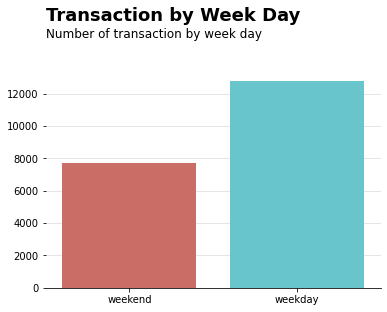

In [9]:
fig, weekday = plt.subplots(figsize=(6,4))

weekday = sns.countplot(data=df, x='weekday_weekend', palette='hls')
weekday.set_title("Transaction by Week Day", loc='left', fontweight='bold', size=18, fontfamily='san serif', y=1.2)
weekday.text(0,1.15, "Number of transaction by week day", transform = weekday.transAxes, size=12)

for i in ['left','top','right']:
    weekday.spines[i].set_visible(False)

weekday.grid(alpha=0.4, axis='y')
weekday.set_axisbelow(True)

weekday.set_xlabel(None)
weekday.set_ylabel(None)




plt.show()

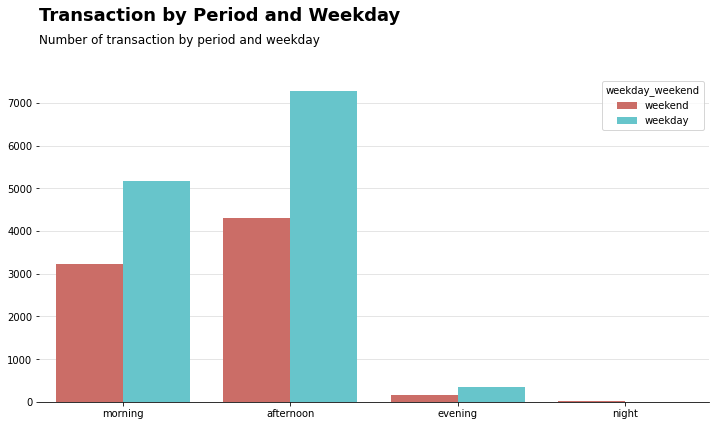

In [10]:
fig, weekday_period = plt.subplots(figsize=(12,6))

weekday_period = sns.countplot(data=df, x='period_day', hue='weekday_weekend', palette='hls')
weekday_period.set_title("Transaction by Period and Weekday", loc='left', y=1.15, fontsize=18, fontweight='bold')
weekday_period.text(0,1.10, "Number of transaction by period and weekday", fontsize=12, transform=weekday_period.transAxes)


for i in ['left', 'top','right']:
    weekday_period.spines[i].set_visible(False)

weekday_period.grid(axis='y', alpha=0.4)
weekday_period.set_axisbelow(True)

weekday_period.set_xlabel(None)
weekday_period.set_ylabel(None)


plt.show()

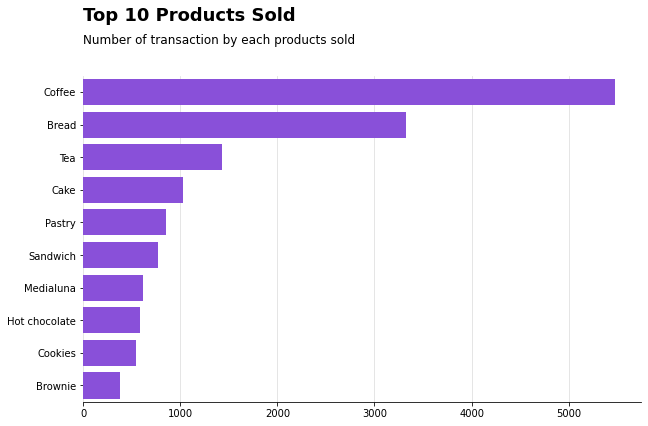

In [11]:

products = df.groupby('Item')['Transaction'].agg('count').sort_values(ascending=False)
products = pd.DataFrame(products)
products.reset_index(inplace=True)


fig, prod = plt.subplots(figsize=(10,6))

prod = sns.barplot(x=products.Transaction[:10], y=products.Item[:10], orient='h', color='#8539F0')
prod.set_title("Top 10 Products Sold", loc='left', y=1.15, fontweight='bold', size='18', fontfamily='san serif')
prod.text(0,1.10, "Number of transaction by each products sold", transform= prod.transAxes, size=12)

for i in ['left', 'top', 'right']:
    prod.spines[i].set_visible(False)

prod.grid(axis='x', alpha=0.4)
prod.set_axisbelow(True)

prod.set_xlabel(None)
prod.set_ylabel(None)

plt.show();

In [23]:
df_fp = df[['Transaction','Item']]
df_fp = df_fp.groupby('Transaction')['Item'].apply(list).to_list()

# instantiate a transaction encoder
transEncoder = TransactionEncoder()

# fit the transaction encoder using the list of transaction
transEncoder.fit(df_fp)

# transform the list of transaction tuples into an array of encoded transactions
enctrans = transEncoder.transform(df_fp)

# convert the array of encoded transactions into a dataframe
df_fp_final = pd.DataFrame(enctrans, columns=transEncoder.columns_)
df_fp_final.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

# List of frequency itemset
frequent_itemsets = fpgrowth(df_fp_final, min_support=0.01, use_colnames = True)
frequent_itemsets.head(10)

,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.015003,(Jam)
5,0.038457,(Muffin)
6,0.478394,(Coffee)
7,0.086107,(Pastry)
8,0.061807,(Medialuna)
9,0.142631,(Tea)


In [38]:
# compute and print the association rules
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
1,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
2,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
4,(Bread),(Hot chocolate),0.327205,0.058320,0.013418,0.041007,0.703144,-0.005665,0.981947
...,...,...,...,...,...,...,...,...,...
69,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
70,(Coffee),(Scone),0.478394,0.034548,0.018067,0.037765,1.093107,0.001539,1.003343
71,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
72,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682
